In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the random module.
import random
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-42.691310490656406 -62.55429066346011
5.632444022541819 166.53815200586257
-22.139536018354818 150.03576622379148
60.04478516654521 -119.97039193428233
-79.04268233720117 -73.36285447078453
-8.19144622875173 -149.4459570596608
-13.921315759163534 -81.60229112255672
-57.06260625821018 3.2450761457926376
-41.91278916533651 12.062303527636914
81.0033192076622 115.704608309803
-82.66631918261452 88.26592192190554
-82.82396284992643 -79.86982086866473
-54.93493418323114 -97.50237259534153
-6.9053056800303665 54.61473963292059
-19.363495937790702 137.81556156235246
-8.83801078556732 9.71660587209854
-43.91430642664542 -118.6381865279544
25.210817398554127 -24.317117689668237
11.441332109503932 -47.71633268740632
39.00649389546598 40.720470658059384
-32.45589218132647 111.87439570490534
51.627887128241014 84.78319281701567
-11.046307967657114 143.2954907607056
-3.2596897634678754 -16.382685283780887
84.32972116666932 34.979801462992555
1.4642557844152009 -179.86119734381322
19.21049914893038

-5.261760449168463 133.64672732754707
23.0299690990972 96.30789584349861
89.18578796009348 -105.28072070593623
-62.49307326089798 20.84143240649894
-55.05445077584339 19.954958917119853
8.137646408553692 -66.73297923478127
-43.96525587834485 59.21054883609571
21.566949343290275 151.18758878264498
-5.785184014779858 -119.23126263459989
-21.98545695398313 -121.98711571213676
5.126587551575028 -11.509399760884605
83.20518615817522 -106.24729612773949
37.35853541980718 -103.03967759041251
-81.10262604472159 86.85143580576198
31.380906823521542 38.569909275724996
62.89205048617728 116.48743098262139
35.78700547395313 123.63121452962412
54.06007711020359 -40.40062173403629
-20.599229221548697 37.33042573536139
-83.24962080250266 113.89982271511644


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | viedma
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | yeppoon
Processing Record 4 of Set 1 | fort nelson
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | hualmay
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | mount isa
Processing Record 14 of Set 1 | luanda
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | cayenne
Processing Record 18 of Set 1 | bingol
Processing Record 19 of Set 1 | belokurikha
Processing Record 20 of Set 1 | daru
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | vardo
Processing Record 23 of Set 1 | vait

Processing Record 38 of Set 4 | villazon
Processing Record 39 of Set 4 | cuencame
Processing Record 40 of Set 4 | zeya
Processing Record 41 of Set 4 | den helder
Processing Record 42 of Set 4 | progreso
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | jega
Processing Record 45 of Set 4 | majene
Processing Record 46 of Set 4 | beruwala
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | stokmarknes
Processing Record 49 of Set 4 | severo-kurilsk
Processing Record 50 of Set 4 | matagami
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | mangrol
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | cerkezkoy
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | jacmel
Processing Record 7 of Set 5 | tiznit
Processing Record 8 of Set 5 | klyuchi
Processing Record 9 of Set 5 | port hardy
Processing Record 10 of Set 5 | kerikeri
Proce

Processing Record 27 of Set 8 | ye
City not found. Skipping...
Processing Record 28 of Set 8 | maldonado
Processing Record 29 of Set 8 | marcona
City not found. Skipping...
Processing Record 30 of Set 8 | mastacani
Processing Record 31 of Set 8 | san juan
Processing Record 32 of Set 8 | briancon
Processing Record 33 of Set 8 | ponta delgada
Processing Record 34 of Set 8 | cherskiy
Processing Record 35 of Set 8 | coachella
Processing Record 36 of Set 8 | mogadishu
Processing Record 37 of Set 8 | shimoda
Processing Record 38 of Set 8 | kyra
Processing Record 39 of Set 8 | sargur
Processing Record 40 of Set 8 | ambovombe
Processing Record 41 of Set 8 | iskateley
Processing Record 42 of Set 8 | tucuman
Processing Record 43 of Set 8 | olafsvik
Processing Record 44 of Set 8 | yerbogachen
Processing Record 45 of Set 8 | jumla
Processing Record 46 of Set 8 | esmeralda
Processing Record 47 of Set 8 | asosa
Processing Record 48 of Set 8 | cruzilia
Processing Record 49 of Set 8 | atikokan
Process

Processing Record 15 of Set 12 | bud
Processing Record 16 of Set 12 | thongwa
Processing Record 17 of Set 12 | kununurra
Processing Record 18 of Set 12 | bargal
City not found. Skipping...
Processing Record 19 of Set 12 | valdivia
Processing Record 20 of Set 12 | iralaya
Processing Record 21 of Set 12 | plettenberg bay
Processing Record 22 of Set 12 | porto empedocle
Processing Record 23 of Set 12 | wajima
Processing Record 24 of Set 12 | peoria
Processing Record 25 of Set 12 | danesti
Processing Record 26 of Set 12 | benghazi
Processing Record 27 of Set 12 | sudbury
Processing Record 28 of Set 12 | yumen
Processing Record 29 of Set 12 | high level
Processing Record 30 of Set 12 | guangyuan
Processing Record 31 of Set 12 | saurimo
Processing Record 32 of Set 12 | solovetskiy
City not found. Skipping...
Processing Record 33 of Set 12 | bilibino
Processing Record 34 of Set 12 | acarau
Processing Record 35 of Set 12 | stykkisholmur
Processing Record 36 of Set 12 | grindavik
Processing Rec

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Viedma,-40.8135,-62.9967,48.24,83,100,17.65,AR,2022-07-14 20:49:08
1,Butaritari,3.0707,172.7902,81.90,80,36,17.56,KI,2022-07-14 20:45:37
2,Yeppoon,-23.1333,150.7333,46.18,71,0,5.93,AU,2022-07-14 20:48:38
3,Fort Nelson,58.8053,-122.7002,71.19,37,75,8.05,CA,2022-07-14 20:53:42
4,Ushuaia,-54.8000,-68.3000,33.42,80,0,2.30,AR,2022-07-14 20:46:45
5,Faanui,-16.4833,-151.7500,77.83,63,100,23.58,PF,2022-07-14 20:53:42
6,Hualmay,-11.0964,-77.6139,64.45,73,49,14.25,PE,2022-07-14 20:53:42
7,Cape Town,-33.9258,18.4232,59.38,86,10,4.61,ZA,2022-07-14 20:40:51
8,Saskylakh,71.9167,114.0833,41.86,84,100,5.61,RU,2022-07-14 20:45:38
9,Busselton,-33.6500,115.3333,59.05,76,77,13.80,AU,2022-07-14 20:45:35


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

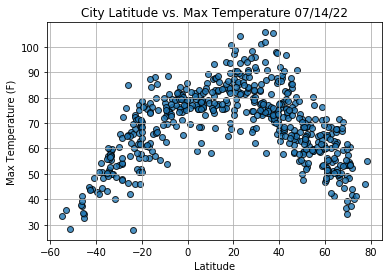

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

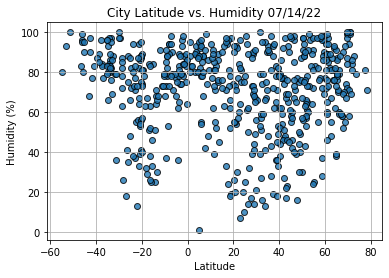

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

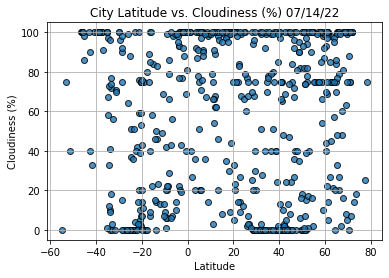

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

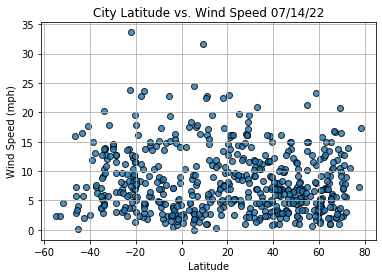

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Luanda
Lat                       -8.8368
Lng                       13.2343
Max Temp                     69.8
Humidity                       88
Cloudiness                     20
Wind Speed                   6.91
Country                        AO
Date          2022-07-14 20:42:10
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

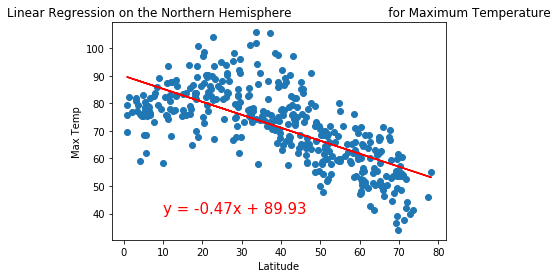

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

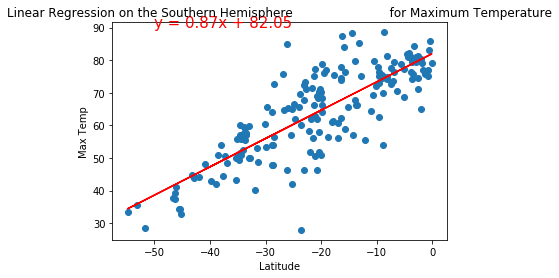

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

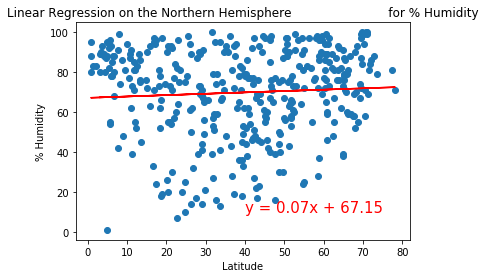

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

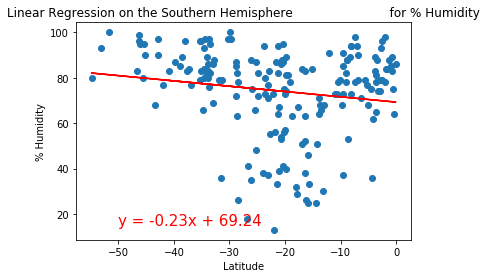

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

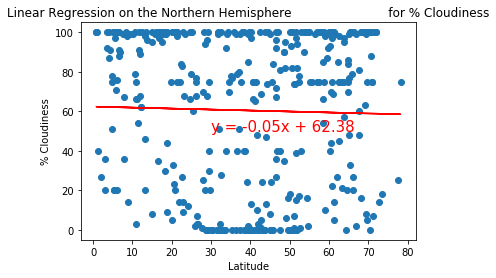

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,50))

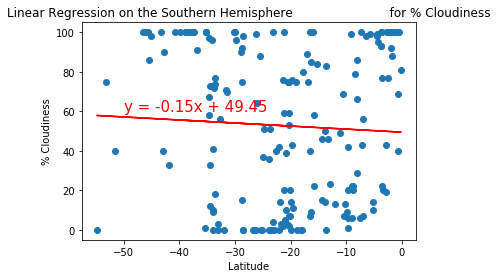

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

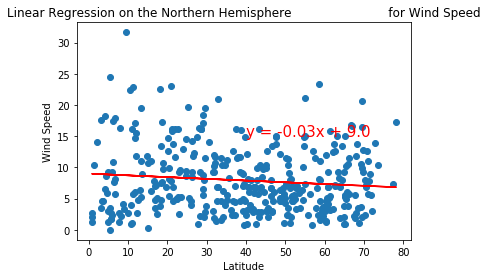

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,15))

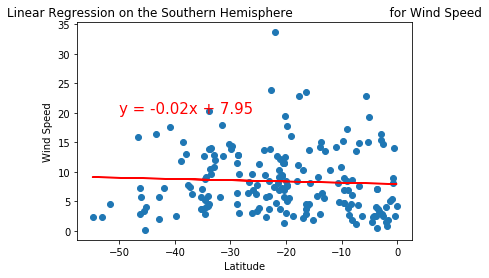

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))